## Evaluation metrics for Classification

*Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are*

### 4.1 Accuracy score

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.columns = data.columns.str.lower().str.replace(' ','_')

categorical_cols = list(data.dtypes[data.dtypes == 'object'].index)
for c in categorical_cols:
    data[c] = data[c].str.lower().str.replace(' ','_')

data['totalcharges'] = pd.to_numeric(data['totalcharges'],errors='coerce')
data['totalcharges'] = data['totalcharges'].fillna(0)

data['churn'] = (data['churn'] == 'yes').astype(int)

data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [5]:
df_full_train, df_test = train_test_split(data,test_size=0.2,random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

del df_train['churn']
del df_val['churn']
del df_test['churn']

categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 
                    'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup',
                    'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 
                    'contract', 'paperlessbilling','paymentmethod']

numerical_cols = ['tenure','monthlycharges','totalcharges']

use_features = categorical_cols + numerical_cols

dv=DictVectorizer(sparse=False)

dict_train = df_train[use_features].to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

dict_val = df_val[use_features].to_dict(orient='records')
X_val = dv.transform(dict_val)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >= 0.5)

(y_val == churn_decision).mean()

0.8034066713981547

### 4.2 Accuracy and dummy model

* Evaluate accuracy for different thresholds
* Check the accuracy of dummy baselines

In [6]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)

#     score = (y_val == churn_decision).mean()
    score = accuracy_score(y_val,churn_decision)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


We can see that the threshold of 0.5 gives the best accuracy

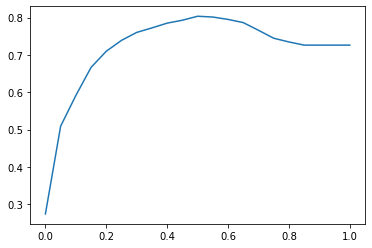

In [7]:
plt.plot(thresholds,scores)

With threshold of 1.0 we can see that all predictions will be considered as non-churning 

In [8]:
from collections import Counter

Counter(y_pred >= 1.0)

Counter({False: 1409})

Let us take a dummy model, where we do not do any actual predictions, but take all output as ones or take all output as zeros (the possible output value can be 0 or 1) and see what the accuracy score will be for these dummy models

In [9]:
y_ones = np.ones(len(y_val))
accuracy_score(y_val,(y_ones >= 0.5))

0.2739531582682754

In [10]:
y_zeros = np.zeros(len(y_val))
accuracy_score(y_val,(y_zeros >= 0.5))

0.7260468417317246

Thus we can see that without using any actual ML model, with just a dummy model with all zeros also we have accuracy score of 72.6% which is really good for no effort. This is because there is a class imbalance

In [11]:
Counter(y_val == 0.0)

Counter({True: 1023, False: 386})

There are 1023 zeros and 386 ones in the target (which is 72.6% zeros). Thus we have a class imbalance. And in such cases, accuracy score of a model may not be the true representative of how good the model is, since even for a dummy model the score could be good.

### 4.3 Confusion table

* Different types of erros and correct decisions
* Arranging them in a table

Confusion matrix as a means of understanding 
* Correct predictions: 
  * true positive (tp) - correctly predicted 1 as output
  * true negative (tn) - correctly predicted 0 as output] 
* Incorrect predictions:
  * false positive (fp) - output predicted as 0 but is actually 1
  * false negative (fn) - output predicted as 1 but is actually 0

In [12]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [13]:
t = 0.5
predicted_positive = (y_pred >= t)
predicted_negative = (y_pred < t)

In [14]:
tp = (actual_positive & predicted_positive).sum()
tp

210

In [15]:
tp = (actual_positive & predicted_positive).sum()
tn = (actual_negative & predicted_negative).sum()
fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_positive).sum()

In [16]:
tn = (actual_negative & predicted_negative).sum()
tn

922

In [17]:
fp = (predicted_positive & actual_negative).sum()
fp

101

In [18]:
fn = (predicted_negative & actual_positive).sum()
fn

176

Confusion Matrix:

         tn  |  fp
         _________
         fn  |  tp

In [19]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[922, 101],
       [176, 210]])

In [20]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

### 4.4 Precision and Recall

* Precision is about predicted positives (1’s)
  * Predicted positives (1’s) comprises of:
    * tp (predicted positive which are actually positive)
    * fp (predicted positive but actually not)
  
  **Precision: out of predicted positives (tp + fp), how many we predicted correctly (tp)**
  
  ```precision =  tp / (tp + fp)```


* Recall is about actual positives (1's)
  * Actual positives (1’s) comprises of:
    * tp (predicted positive which are actually positive)
    * fn (predicted negative but actually positive)

  **Recall is about actual positives - out of actual positives (tp + fn), how many we got correct (tp)**
   
  ```recall = tp / (tp + fn)```

In [21]:
#Accuracy
accuracy = (tp + tn)/(tp + fp + tn + fn)
accuracy

0.8034066713981547

In [22]:
#Predictions = correct predictions + incorrect predictions
#Predicted positives - tp + fp
#Predicted negatives - tn + fn

#Actuals = 
#Actual positives - tp + fn
#Actual negatives - tn + fp

#Precision - looks at predicted positives. fraction of positive prediction that are correct = tp / predicted positives
#Precision = tp / (tp + fp)
precision = tp / (tp + fp)
precision

0.6752411575562701

In [23]:
#Recall = looks at actual positives. fraction of correctly identified positives = tp / actual positives
recall = tp / (tp + fn)
recall

0.5440414507772021

### 4.5 ROC curves

ROC (receiver operating characteristic curve) was initially developed for radar receiver systems. It is a plot of true positive rate (TPR) against false positive rate (FPR) at various thresholds. 

The result of a classification model is an arbitrary real value (continuous output typically between 0 and 1 and not an exact 0 or a 1). 

Hence, it is essential to determine the classifier boundary (threshold value) to determine which values to classify as 0 and which as 1 

(e.g. threshold of 0.72 would mean predicted values >= 0.72 should be considered as 1 and values < 0.72 as 0).


In [24]:
#TPR = Looking at actual positives - fraction of TP out of all positive = TP / (TP + FN)
#FPR = Looking at actual negatives - fraction of FP out of all negatives = FP / (FP + TN)

In [25]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [26]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [27]:
thresholds = np.linspace(0,1,101)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)
    
    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    fp = (predicted_positive & actual_negative).sum()
    fn = (predicted_negative & actual_positive).sum()
    
#     tpr = tp / (tp + fn)
#     fpr = fp / (fp + tn)
    
    scores.append((t, tp, fp, fn, tn))

In [28]:
scores[::10]

[(0.0, 386, 1023, 0, 0),
 (0.1, 366, 556, 20, 467),
 (0.2, 333, 356, 53, 667),
 (0.3, 284, 236, 102, 787),
 (0.4, 249, 166, 137, 857),
 (0.5, 210, 101, 176, 922),
 (0.6, 150, 53, 236, 970),
 (0.7000000000000001, 76, 20, 310, 1003),
 (0.8, 13, 1, 373, 1022),
 (0.9, 0, 0, 386, 1023),
 (1.0, 0, 0, 386, 1023)]

In [29]:
columns = ['threshold','tp','fp','fn','tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [30]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,912,1,111
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [31]:
df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])

In [32]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


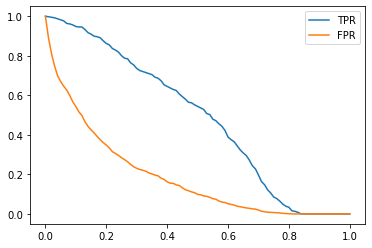

In [33]:
plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')
plt.plot(df_scores['threshold'], df_scores['fpr'], label='FPR')
plt.legend()

### Random model

Random model would be a model where instead of having an actual function which can predict the output from input, we randomly choose a real number between 0 and 1 as the prediction.

In [34]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [35]:
accuracy_rand = ((y_rand >= 0.5) == y_val).mean()
accuracy_rand

0.5017743080198722

In [36]:
def tpr_fpr_dataframe(y_val,y_pred):
    thresholds = np.linspace(0,1,101)

    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predicted_positive = (y_pred >= t)
        predicted_negative = (y_pred < t)

        tp = (actual_positive & predicted_positive).sum()
        tn = (actual_negative & predicted_negative).sum()
        fp = (predicted_positive & actual_negative).sum()
        fn = (predicted_negative & actual_positive).sum()

    #     tpr = tp / (tp + fn)
    #     fpr = fp / (fp + tn)

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold','tp','fp','fn','tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])
        
    return df_scores

In [37]:
df_rand = tpr_fpr_dataframe(y_val,y_rand)

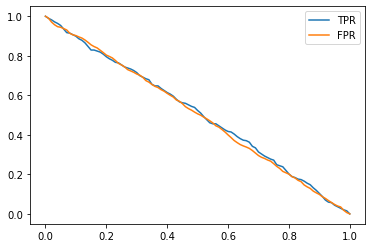

In [38]:
plt.plot(df_rand['threshold'], df_rand['tpr'], label='TPR')
plt.plot(df_rand['threshold'], df_rand['fpr'], label='FPR')
plt.legend()

### Ideal model

Ideal model would be the one which can provide correct predictions for all the observations.

To derive an ideal model what we need is the correct threshold that can identify what predicted values should be classified as 0 and what predicted values to be classified as 1.

We will use the validation dataset and look at how many 0's and how many 1's are there in the target variable. 

Our ideal model could then be derived by arranging these in a sorted manner - all 0's first, then all 1's.

The threshold for the ideal model then would be = distribution of 0's and 1's

e.g. suppose there are 800 0's and 200 1's, then threshold would be 0.8

In [39]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.linspace(0,1,len(y_val))

In [40]:
threshold = (1 - y_val).mean()
threshold

0.7260468417317246

In [41]:
((y_ideal >= threshold) == y_val).mean()

0.6011355571327183

In [42]:
df_ideal = tpr_fpr_dataframe(y_val,y_ideal)

In [43]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,348,920,38,103,0.901554,0.899316
20,0.2,306,821,80,202,0.792746,0.802542
30,0.3,268,718,118,305,0.694301,0.701857
40,0.4,233,612,153,411,0.603627,0.598240
50,0.5,190,515,196,508,0.492228,0.503421
60,0.6,152,412,234,611,0.393782,0.402737
70,0.7,115,308,271,715,0.297927,0.301075
80,0.8,73,209,313,814,0.189119,0.204301
90,0.9,40,101,346,922,0.103627,0.098729


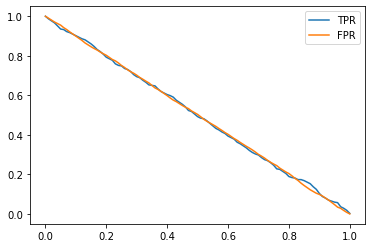

In [44]:
plt.plot(df_ideal['threshold'], df_ideal['tpr'], label='TPR')
plt.plot(df_ideal['threshold'], df_ideal['fpr'], label='FPR')
plt.legend()

### Putting all together

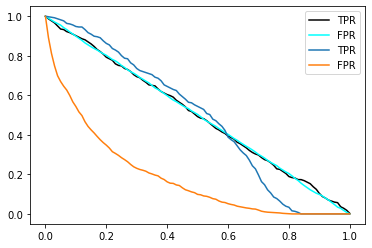

In [45]:
plt.plot(df_ideal['threshold'], df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal['threshold'], df_ideal['fpr'], label='FPR', color='cyan')

# plt.plot(df_rand['threshold'], df_rand['tpr'], label='TPR')
# plt.plot(df_rand['threshold'], df_rand['fpr'], label='FPR')

plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')
plt.plot(df_scores['threshold'], df_scores['fpr'], label='FPR')



plt.legend()

Plotting TPR Vs FPR

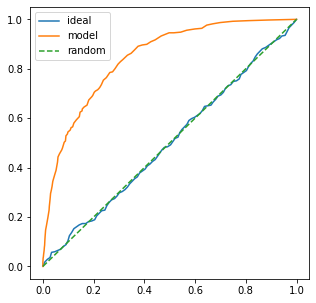

In [46]:
plt.figure(figsize=(5,5))
plt.plot(df_ideal['fpr'],df_ideal['tpr'],label='ideal')
plt.plot(df_scores['fpr'],df_scores['tpr'],label='model')
plt.plot([0,1],[0,1],label='random',linestyle='--')
plt.legend()

In [47]:
#Using auc_curve from sklearn
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_val,y_pred)

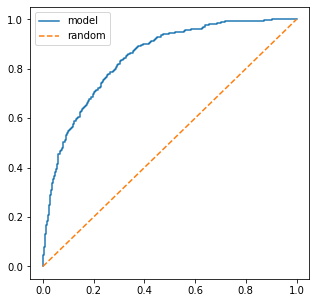

In [48]:
plt.figure(figsize=(5,5))
# plt.plot(fpr,tpr,label='ideal')
plt.plot(fpr,tpr,label='model')
plt.plot([0,1],[0,1],label='random',linestyle='--')
plt.legend()

### Area under ROC curve

* Area under the ROC curve - useful metric
* Intepretation of AUC

In [49]:
#sklearn class auc can calculate area under the curve for any type of curve not just ROC
from sklearn.metrics import auc

In [50]:
auc(fpr,tpr)

0.8438555705812933

In [51]:
auc(df_ideal['fpr'], df_ideal['tpr'])

0.49968597896059036

In [52]:
auc(df_rand['fpr'], df_rand['tpr'])

0.5060233793728696

In [53]:
#Since auc is not for ROC only, typically the full code would be something like below
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, threshold = roc_curve(y_val,y_pred)
auc(fpr,tpr)

0.8438555705812933

In [54]:
#Instead of the above 2 steps, we can also use the class roc_auc_score from sklearn to do this in one step
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred)

0.8438555705812933

#### Interpretation of AUC

AUC tell us the probability of randomly selected positive examples having score higher than randomly selected negative examples from our dataset.

In [55]:
pred_neg_examples = y_pred[y_val == 0]
pred_pos_examples = y_pred[y_val == 1]

In [56]:
import random

In [57]:
#random.randint selects an integer between the 2 specified values, both inclusive
rand_neg = random.randint(0,len(pred_neg_examples) - 1)
rand_pos = random.randint(0,len(pred_pos_examples) - 1)

#If we execute this multiple times then we will see how many times the output of below is True Vs False
pred_pos_examples[rand_pos] > pred_neg_examples[rand_neg]

False

In [58]:
#We can run the above random comparison multiple times and find how many times random postive examples have more score than random negative examples (we should get this close to the auc score)
n = 100000

success = 0

for i in range(n):
    rand_neg = random.randint(0,len(pred_neg_examples) - 1)
    rand_pos = random.randint(0,len(pred_pos_examples) - 1)
    
    if pred_pos_examples[rand_pos] > pred_neg_examples[rand_neg]:
        success = success + 1
success / n    


0.84295

In [59]:
#We can do the above multiple random indices using numpy, here the last value is exclusive
n= 100000
np.random.seed(1)
pos_idx = np.random.randint(0,len(pred_pos_examples),size=n)
neg_idx = np.random.randint(0,len(pred_neg_examples),size=n)

In [60]:
pred_pos_examples[pos_idx] > pred_neg_examples[neg_idx]

array([False, False,  True, ...,  True,  True,  True])

In [61]:
(pred_pos_examples[pos_idx] > pred_neg_examples[neg_idx]).mean()

0.8429

#### Thus, AUC is quite often used to see the interpretation of a binary classification model

### 4.7 Cross Validation

* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

In [83]:
def train(df_train, y_train):
    dicts = df_train[categorical_cols + numerical_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    return dv, model

In [84]:
dv, model = train(df_train, y_train)

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
def predict(df, dv, model):
    dicts = df[categorical_cols + numerical_cols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [86]:
y_pred = predict(df_val, dv, model)

In [87]:
from sklearn.model_selection import KFold

In [88]:
n_splits = 10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

In [89]:
next(kfold.split(df_full_train))

(array([   0,    1,    2, ..., 5631, 5632, 5633]),
 array([   4,   21,   28,   33,   44,   58,   67,   72,   79,   81,   82,
          98,  101,  116,  119,  125,  126,  136,  141,  147,  161,  169,
         179,  192,  196,  200,  206,  214,  222,  231,  250,  255,  259,
         276,  280,  285,  301,  308,  313,  314,  325,  343,  354,  359,
         383,  386,  407,  420,  428,  433,  440,  447,  457,  473,  486,
         496,  501,  503,  507,  545,  554,  557,  566,  574,  580,  582,
         592,  605,  608,  623,  634,  636,  645,  662,  667,  684,  687,
         689,  729,  745,  758,  763,  778,  783,  792,  795,  808,  839,
         840,  847,  850,  858,  867,  870,  871,  881,  899,  906,  927,
         929,  931,  940,  943,  976,  984,  987,  988, 1005, 1016, 1028,
        1034, 1038, 1050, 1056, 1074, 1079, 1117, 1122, 1123, 1131, 1134,
        1139, 1144, 1155, 1159, 1163, 1169, 1179, 1198, 1206, 1216, 1238,
        1247, 1256, 1272, 1297, 1298, 1310, 1344, 1356, 1370,

In [90]:
train_idx, val_idx = next(kfold.split(df_full_train))
len(train_idx), len(val_idx)

(5070, 564)

In [91]:
len(df_full_train)

5634

In [92]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train['churn'].values
    y_val = df_val['churn'].values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val,y_pred)
    scores.append(auc)

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [93]:
scores

[0.8479398247539081,
 0.8410426980198019,
 0.8557214756739697,
 0.8340136614270431,
 0.8257754342431762,
 0.8342657342657342,
 0.8412569195701727,
 0.8186669829222013,
 0.8453090262338817,
 0.8619206077106653]

In [94]:
np.mean(scores), np.std(scores)

(0.8405912364820555, 0.012426704383179247)

In [95]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_cols + numerical_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [97]:
dv, model = train(df_train, y_train, C=0.001)

In [98]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [99]:
from tqdm.auto import tqdm

In [100]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.008
C=0.5 0.840 +- 0.007
C=1 0.840 +- 0.009
C=5 0.841 +- 0.008
C=10 0.841 +- 0.007


In [101]:
scores

[0.8437369986890754,
 0.845763392265925,
 0.8327714228376479,
 0.8325745827204708,
 0.8509460010668006]

In [102]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

### 4.8 Summary

* Metric - a single number that describes the performance of a model
* Accuracy - fraction of correct answers; sometimes misleading
* Precision and recall are less misleading when we have class inbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)